# Clustering for the LoanIDs

## Testing for make it best

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import OPTICS

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv("../All Data Create/Dataset/New Dataset half million.csv")

In [3]:
df.head()

,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,Applicant Age,summary_income,summary_income_cv,city,state,Country
0,0060K00000RW5M4QAL,0010K00001fghU0QAI,75,73,Living Expenses,4,200,4.571,Weekly,Loan Paid,53,6500.0,NaN,Whittlesea,VIC,Australia
1,0062x00000AkpZnAAJ,0010K00001fghU0QAI,75,73,Living Expenses,10,200,10.429,Weekly,Loan Paid,53,6500.0,14429.94,Whittlesea,VIC,Australia
2,0062x00000AHV4lAAH,0010K00001fghU0QAI,75,73,Living Expenses,10,200,11.429,Weekly,Loan Paid,53,6500.0,9924.14,Whittlesea,VIC,Australia
3,0062x000009Ua6WAAS,0010K00001fghU0QAI,75,73,Living Expenses,10,200,10.286,Weekly,Loan Paid,53,6500.0,14683.88,Whittlesea,VIC,Australia
4,0062x000008zdrUAAQ,0010K00001fghU0QAI,75,73,Living Expenses,6,200,6.571,Weekly,Loan Paid,53,6500.0,8691.38,Whittlesea,VIC,Australia


In [4]:
df.shape

(514658, 16)

In [5]:
df[['Amount','Total_Repayments__c']].loc[1:1000]

,Amount,Total_Repayments__c
1,200,10
2,200,10
3,200,10
4,200,6
5,200,10
...,...,...
996,2000,2
997,2000,2
998,2000,2
999,2000,3


#### Checking for null values

In [6]:
df.isnull().sum()

Id                                0
AccountID                         0
Number_Of_Loans_Granted__c        0
Num_Of_Loans_Paid__c              0
Purpose_of_Loan__c               19
Total_Repayments__c               0
Amount                            0
Term_in_Weeks__c                  0
Payment_Frequency__c              0
StageName                         0
Applicant Age                     0
summary_income                    0
summary_income_cv             22618
city                           2367
state                             0
Country                           0
dtype: int64

<h2> DBSCAN </h2>
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise and is one of clustering algorithms implemented in scikit-learn library.  “A Density-Based Algorithm for Discovering Clusters in Large Spatial Database with Noise”.

The core idea of DBSCAN is around concept of dense regions. The assumption is that natural clusters are composed of densely located points. This requires definition of “dense region”. To do these two parameters are required for DBSCAN algorithm.

Eps, ε - distance
MinPts – Minimum number of points within distance Eps
Optionally the distance metric can be specified by a user, but usually Euclidean distance is implemented (like in scikit learn).

A “dense region” is therefore created by a minimum number of points within distance between all of them, Eps. Points which are within this distance but not close to minimum number of other points are treated as “border points”. Remaining ones are noise or outliers. This is shown in the picture below (for MinPts=3). Red points (D) are in a “dense region” – each one has minimum of 3 neighbours within distance Eps. Green points (B) are border ones – they have a neighbour within distance Eps but less than 3. Blue point (O) is an outlier – no neighbours within distance Eps.

<img src="https://pbs.twimg.com/media/FyBSN5_aIAAH6Rb?format=jpg&name=4096x4096" height="400" width="500" />

- Advantages of this approach:
    - it finds number of clusters itself, based on eps and MinPts parameters
    - It it able to differentiate elongated clusters or clusters surrounded by other clusters in contrary to e.g. K-Means where clusters are always convex.
    - It is also able to find points not fitting into any cluster – it detects outliers.

- The biggest drawback of DBSCAN:
    - High computational expense of average O(n log(n)) coming from a need to execute a neighbourhood query for each point.
    - Poorly identifies clusters with various densities

In DBSCAN there are two major hyperparameters:
- eps
- min_samples

In [7]:
import time

In [8]:
X = df[['Amount','Total_Repayments__c']].iloc[:200000]
X_val = df[['Amount','Total_Repayments__c']].iloc[20000:300000]

In [57]:
X.describe()

,Amount,Total_Repayments__c
count,200000.000000,200000.000000
mean,905.692500,6.679615
std,900.051427,4.267150
min,100.000000,1.000000
25%,350.000000,4.000000
50%,500.000000,5.000000
75%,1000.000000,10.000000
max,5000.000000,40.000000


In [9]:

# Create a DBSCAN estimator
dbscan = DBSCAN(eps=0.1,min_samples=5)

# Fit the GridSearchCV object to the data
starttime = time.time()
dbscan.fit(X)
endtime = time.time()
 

# Evaluate the best model on the validation set
val_labels = dbscan.fit_predict(X_val)
val_score = silhouette_score(X_val, val_labels)

print("Validation silhouette score:", val_score)

print(f"The Time Required to run the model is {(endtime-starttime)/3600}")


Validation silhouette score: 0.99082366188965
The Time Required to run the model is 0.0027169944180382623


In [ ]:
len(val_labels)

In [13]:
df_copy =  df[['Amount','Total_Repayments__c']].iloc[20000:300000]

In [14]:
df_copy["Cluster_result"] = val_labels

<Axes: >

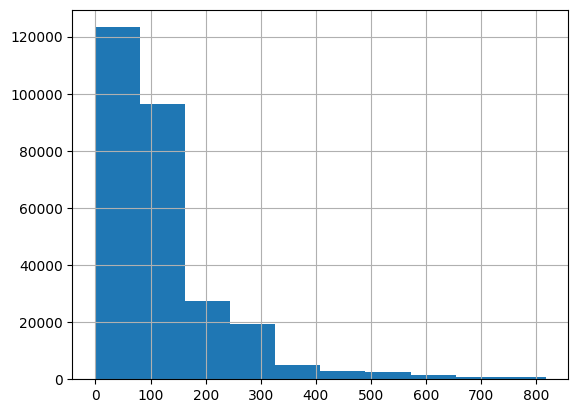

In [15]:
df_copy["Cluster_result"].hist()

In [16]:
df_copy["Cluster_result"].value_counts()

Cluster_result
89     13098
104     9708
75      9329
59      8338
46      8164
       ...  
737        5
703        5
781        5
782        5
397        5
Name: count, Length: 819, dtype: int64

In [17]:
df_copy["Cluster_result"].describe()

count    280000.000000
mean        117.302100
std         112.458334
min          -1.000000
25%          46.000000
50%          89.000000
75%         143.000000
max         817.000000
Name: Cluster_result, dtype: float64

In [20]:
df_copy[df_copy["Cluster_result"]==816]

,Amount,Total_Repayments__c,Cluster_result
174778,3350,18,816
178769,3350,18,816
197858,3350,18,816
204356,3350,18,816
208346,3350,18,816
281556,3350,18,816


In [53]:
df_copy[["Total_Repayments__c","Cluster_result", "Amount"]].groupby("Cluster_result").describe().to_csv("Report_Created.csv")

In [24]:
val_labels = dbscan.fit_predict(df[['Amount','Total_Repayments__c']].iloc[:200000])

In [27]:
val_labels1 = dbscan.fit_predict(df[['Amount','Total_Repayments__c']].iloc[200000:400000])

In [28]:
val_labels2 =  dbscan.fit_predict(df[['Amount','Total_Repayments__c']].iloc[400000:])

In [30]:
len(val_labels2)

114658

In [31]:
df_copy1 = df[['Amount','Total_Repayments__c']].iloc[:200000]

In [32]:
df_copy1['Cluster_result'] = val_labels

In [33]:
df_copy2 = df[['Amount','Total_Repayments__c']].iloc[200000:400000]

In [34]:
df_copy2['Cluster_result'] = val_labels1

In [35]:
df_copy3 =  df[['Amount','Total_Repayments__c']].iloc[400000:]

In [36]:
df_copy3['Cluster_result'] = val_labels2

In [38]:
df_result  =  pd.concat([df_copy1, df_copy2, df_copy3])

In [40]:
df_result.shape

(514658, 3)

In [41]:
df_result[["Total_Repayments__c","Cluster_result", "Amount"]].groupby("Cluster_result").describe()

Total_Repayments__c                                         \
                             count       mean       std   min   25%   50%   
Cluster_result                                                              
-1                          3709.0  15.370989  8.956257   1.0   8.0  14.0   
 0                          4758.0   5.265658  1.126459   4.0   4.0   6.0   
 1                          4842.0   8.141264  2.416606   5.0   5.0  10.0   
 2                          5471.0   6.866569  1.215725   6.0   6.0   7.0   
 3                          1557.0   5.845857  1.685605   4.0   4.0   7.0   
...                            ...        ...       ...   ...   ...   ...   
 731                           6.0  13.000000  0.000000  13.0  13.0  13.0   
 732                           5.0   6.000000  0.000000   6.0   6.0   6.0   
 733                           6.0  12.000000  0.000000  12.0  12.0  12.0   
 734                           5.0  35.000000  0.000000  35.0  35.0  35.0   
 735                           5.0  30.000000  0.000000  30.0  30.0  30.0   

                            Amount                                            \
                 75%   max   count         mean          std     min     25%   
Cluster_result                                                                 
-1              21.0  45.0  3709.0  2477.810731  1291.559273   100.0  1400.0   
 0               6.0   7.0  4758.0   291.551072   119.771657   200.0   200.0   
 1              10.0  10.0  4842.0   889.962825   684.531512   200.0   200.0   
 2               7.0  10.0  5471.0   643.538658   425.251639   200.0   200.0   
 3               7.0   8.0  1557.0   856.615286   569.228530   250.0   250.0   
...              ...   ...     ...          ...          ...     ...     ...   
 731            13.0  13.0     6.0  1600.000000     0.000000  1600.0  1600.0   
 732             6.0   6.0     5.0  1750.000000     0.000000  1750.0  1750.0   
 733            12.0  12.0     6.0   950.000000     0.000000   950.0   950.0   
 734            35.0  35.0     5.0  5000.000000     0.000000  5000.0  5000.0   
 735            30.0  30.0     5.0  2250.000000     0.000000  2250.0  2250.0   

                                        
                   50%     75%     max  
Cluster_result                          
-1              2450.0  3400.0  5000.0  
 0               300.0   300.0   600.0  
 1              1000.0  1000.0  2000.0  
 2              1000.0  1000.0  1200.0  
 3              1000.0  1500.0  1500.0  
...                ...     ...     ...  
 731            1600.0  1600.0  1600.0  
 732            1750.0  1750.0  1750.0  
 733             950.0   950.0   950.0  
 734            5000.0  5000.0  5000.0  
 735            2250.0  2250.0  2250.0  

[737 rows x 16 columns]

In [42]:
df['Cluster_result'] = df_result["Cluster_result"]

In [44]:
df.head()

,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,Applicant Age,summary_income,summary_income_cv,city,state,Country,Cluster_result
0,0060K00000RW5M4QAL,0010K00001fghU0QAI,75,73,Living Expenses,4,200,4.571,Weekly,Loan Paid,53,6500.0,NaN,Whittlesea,VIC,Australia,0
1,0062x00000AkpZnAAJ,0010K00001fghU0QAI,75,73,Living Expenses,10,200,10.429,Weekly,Loan Paid,53,6500.0,14429.94,Whittlesea,VIC,Australia,1
2,0062x00000AHV4lAAH,0010K00001fghU0QAI,75,73,Living Expenses,10,200,11.429,Weekly,Loan Paid,53,6500.0,9924.14,Whittlesea,VIC,Australia,1
3,0062x000009Ua6WAAS,0010K00001fghU0QAI,75,73,Living Expenses,10,200,10.286,Weekly,Loan Paid,53,6500.0,14683.88,Whittlesea,VIC,Australia,1
4,0062x000008zdrUAAQ,0010K00001fghU0QAI,75,73,Living Expenses,6,200,6.571,Weekly,Loan Paid,53,6500.0,8691.38,Whittlesea,VIC,Australia,2


In [56]:
df.to_csv("Clustered_column_on_half_million_record_V1.csv",index=False)

In [46]:
df[["Total_Repayments__c","Cluster_result", "Amount"]].groupby("Cluster_result").describe()

Total_Repayments__c                                         \
                             count       mean       std   min   25%   50%   
Cluster_result                                                              
-1                          3709.0  15.370989  8.956257   1.0   8.0  14.0   
 0                          4758.0   5.265658  1.126459   4.0   4.0   6.0   
 1                          4842.0   8.141264  2.416606   5.0   5.0  10.0   
 2                          5471.0   6.866569  1.215725   6.0   6.0   7.0   
 3                          1557.0   5.845857  1.685605   4.0   4.0   7.0   
...                            ...        ...       ...   ...   ...   ...   
 731                           6.0  13.000000  0.000000  13.0  13.0  13.0   
 732                           5.0   6.000000  0.000000   6.0   6.0   6.0   
 733                           6.0  12.000000  0.000000  12.0  12.0  12.0   
 734                           5.0  35.000000  0.000000  35.0  35.0  35.0   
 735                           5.0  30.000000  0.000000  30.0  30.0  30.0   

                            Amount                                            \
                 75%   max   count         mean          std     min     25%   
Cluster_result                                                                 
-1              21.0  45.0  3709.0  2477.810731  1291.559273   100.0  1400.0   
 0               6.0   7.0  4758.0   291.551072   119.771657   200.0   200.0   
 1              10.0  10.0  4842.0   889.962825   684.531512   200.0   200.0   
 2               7.0  10.0  5471.0   643.538658   425.251639   200.0   200.0   
 3               7.0   8.0  1557.0   856.615286   569.228530   250.0   250.0   
...              ...   ...     ...          ...          ...     ...     ...   
 731            13.0  13.0     6.0  1600.000000     0.000000  1600.0  1600.0   
 732             6.0   6.0     5.0  1750.000000     0.000000  1750.0  1750.0   
 733            12.0  12.0     6.0   950.000000     0.000000   950.0   950.0   
 734            35.0  35.0     5.0  5000.000000     0.000000  5000.0  5000.0   
 735            30.0  30.0     5.0  2250.000000     0.000000  2250.0  2250.0   

                                        
                   50%     75%     max  
Cluster_result                          
-1              2450.0  3400.0  5000.0  
 0               300.0   300.0   600.0  
 1              1000.0  1000.0  2000.0  
 2              1000.0  1000.0  1200.0  
 3              1000.0  1500.0  1500.0  
...                ...     ...     ...  
 731            1600.0  1600.0  1600.0  
 732            1750.0  1750.0  1750.0  
 733             950.0   950.0   950.0  
 734            5000.0  5000.0  5000.0  
 735            2250.0  2250.0  2250.0  

[737 rows x 16 columns]

In [58]:
df[["Total_Repayments__c","Cluster_result", "Amount"]].groupby("Cluster_result")

In [60]:
df[["Total_Repayments__c","Cluster_result", "Amount"]][df["Cluster_result"]==109].describe()

,Total_Repayments__c,Cluster_result,Amount
count,3678.000000,3678.0,3678.000000
mean,7.853181,109.0,999.429038
std,3.206972,0.0,5.313172
min,3.000000,109.0,950.000000
25%,3.000000,109.0,1000.000000
50%,10.000000,109.0,1000.000000
75%,10.000000,109.0,1000.000000
max,10.000000,109.0,1000.000000


In [61]:
df[["Total_Repayments__c","Cluster_result", "Amount"]][df["Cluster_result"]==106].describe()

,Total_Repayments__c,Cluster_result,Amount
count,1255.000000,1255.0,1255.000000
mean,11.054183,106.0,905.179283
std,4.652546,0.0,339.300263
min,3.000000,106.0,800.000000
25%,10.000000,106.0,800.000000
50%,10.000000,106.0,800.000000
75%,10.000000,106.0,800.000000
max,28.000000,106.0,2050.000000


In [62]:
df[["Total_Repayments__c","Cluster_result", "Amount"]][df["Cluster_result"]==217].describe()

,Total_Repayments__c,Cluster_result,Amount
count,347.000000,347.0,347.000000
mean,12.682997,217.0,1433.861671
std,3.687633,0.0,449.275671
min,10.000000,217.0,1100.000000
25%,10.000000,217.0,1100.000000
50%,10.000000,217.0,1100.000000
75%,17.000000,217.0,2050.000000
max,24.000000,217.0,2050.000000


In [63]:
df[["Total_Repayments__c","Cluster_result", "Amount"]][df["Cluster_result"]==174].describe()

,Total_Repayments__c,Cluster_result,Amount
count,2288.000000,2288.0,2288.000000
mean,8.033217,174.0,824.300699
std,1.694854,0.0,571.119874
min,6.000000,174.0,250.000000
25%,7.000000,174.0,400.000000
50%,7.000000,174.0,400.000000
75%,10.000000,174.0,1500.000000
max,10.000000,174.0,1500.000000


In [78]:
df[["Total_Repayments__c","Cluster_result", "Amount"]][df["Cluster_result"]==735].describe()

,Total_Repayments__c,Cluster_result,Amount
count,5.0,5.0,5.0
mean,30.0,735.0,2250.0
std,0.0,0.0,0.0
min,30.0,735.0,2250.0
25%,30.0,735.0,2250.0
50%,30.0,735.0,2250.0
75%,30.0,735.0,2250.0
max,30.0,735.0,2250.0
